In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data=sio.loadmat('spikewave.mat')

In [3]:
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Tue Nov 08 15:46:15 2005', '__version__': '1.0', '__globals__': [], 'wave': array([[-60, 126,  15, ..., 195, 121,  -7],
       [-13, 174,  13, ..., 204, 176,  71],
       [ 37, 223,  54, ..., 176, 212, 177],
       ...,
       [-55,  67,  11, ..., -31,  25, 164],
       [-59,  57,  10, ..., -18,  12, 160],
       [-56,  65,   6, ..., -10,   7, 120]], dtype=int16)}


In [4]:
spike_data=data['wave']
print(spike_data.shape)
spike_data = spike_data.T
print(spike_data.shape)


(40, 5376)
(5376, 40)


## 1.画出原始波形图

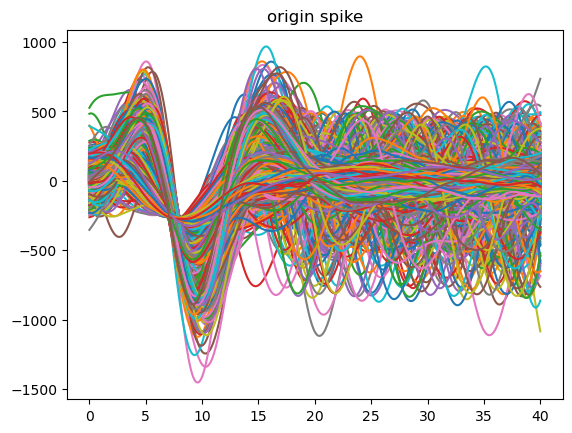

In [5]:
from scipy.interpolate import make_interp_spline

#画出波形图
t = np.arange(0, 40) #按顺序生成40个点
for i in range(5376):
    #曲线平滑处理,代码参考https://blog.csdn.net/m0_48300767/article/details/130075597
    m = make_interp_spline(t, spike_data[i])
    xs = np.linspace(0, 40, 500)
    ys = m(xs)
    plt.plot(xs, ys)
plt.title('origin spike')
plt.show()

## 2.利用PCA进行降维

### 2.1 降至3维进行分析，并画图

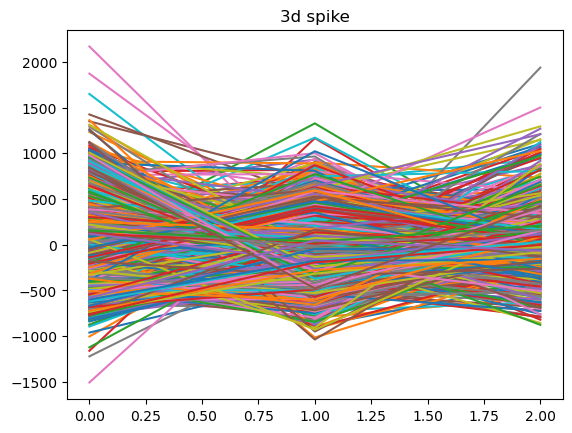

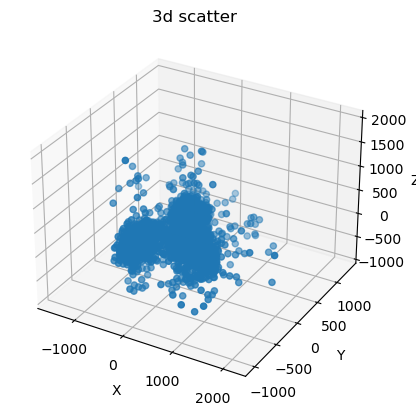

In [6]:
#降为3维进行分析
from sklearn.decomposition import PCA #主成分分析
transfer = PCA(n_components= 3)
new_data = transfer.fit_transform(spike_data)

#波形图
t = np.arange(0, 3) 
for i in range(5376):
    plt.plot(t, new_data[i])
plt.title('3d spike')
plt.show()

#散点图  代码参考课件和https://blog.csdn.net/qq_40985985/article/details/119676953
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(new_data.T[0], new_data.T[1], new_data.T[2])   # 绘制数据点 c: 'r'红色，'y'黄色，等颜色
    
ax.set_title('3d scatter')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### 2.2 降至2维进行分析，并画图

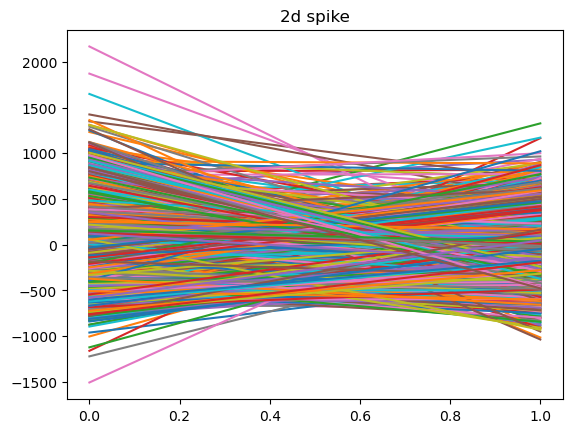

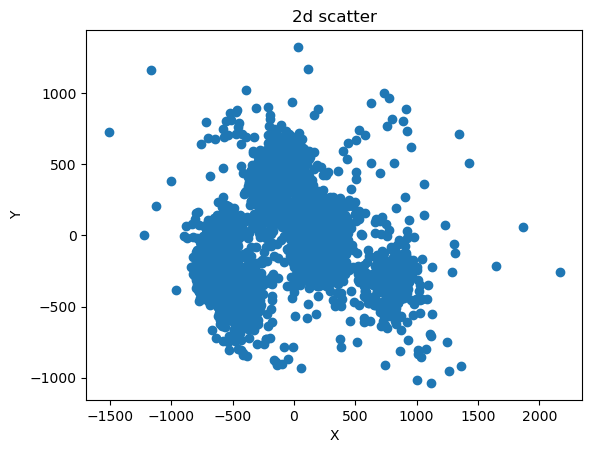

In [7]:
#降为2维进行分析
from sklearn.decomposition import PCA #主成分分析
transfer = PCA(n_components= 2)
new_data2 = transfer.fit_transform(spike_data)

#波形图
t = np.arange(0, 2) 
for i in range(5376):
    plt.plot(t, new_data2[i])
plt.title('2d spike')
plt.show()

#散点图  代码参考课件和https://blog.csdn.net/qq_40985985/article/details/119676953
plt.figure()
plt.scatter(new_data2.T[0], new_data2.T[1])   # 绘制数据点 c: 'r'红色，'y'黄色，等颜色
    
plt.title('2d scatter')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

## 3.利用K-means进行聚类分析

### 3.1 对3维空间进行聚类

In [8]:
#利用K-means进行聚类
from sklearn.cluster import KMeans
kms = KMeans(n_clusters=5) #聚类成5类
kms.fit(new_data)

centers = kms.cluster_centers_
print(centers)

E:\soft\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[-437.14749614 -436.12350036   21.36646543]
 [-112.86344295  452.81874738   78.95911344]
 [ 809.2161768  -322.80846253  129.73730925]
 [ 216.77670633  -18.14007495  -44.48386368]
 [-628.16146427  -96.44495206  -80.42288511]]


In [9]:
#代码参考https://blog.csdn.net/icefountain/article/details/129181949
y_train = pd.Series(kms.labels_)
y_train.rename('res',inplace=True)

result = pd.concat([pd.DataFrame(new_data),y_train],axis=1)
print(result)

Category_one = result[result['res'].values == 0]
k1 = result.iloc[Category_one.index]

Category_two = result[result['res'].values == 1]
k2 = result.iloc[Category_two.index]

Category_three = result[result['res'].values == 2]
k3 =result.iloc[Category_three.index]

Category_four = result[result['res'].values == 3]
k4 =result.iloc[Category_four.index]

Category_five = result[result['res'].values == 4]
k5 =result.iloc[Category_five.index]

               0           1           2  res
0     274.173897  -55.102187 -194.404915    3
1    -652.027320  125.891564  -66.390189    4
2     124.204498   -7.126487 -115.051549    3
3    -532.533707  -22.940726  -28.699638    4
4    -163.147905  386.217092 -328.981872    1
...          ...         ...         ...  ...
5371 -723.096962 -277.957215 -156.536339    4
5372  155.468744   32.376212  208.751908    3
5373 -760.551696 -193.470770   -3.372012    4
5374 -581.524053   44.646031  -66.125793    4
5375  846.141663 -477.687502  418.195433    2

[5376 rows x 4 columns]


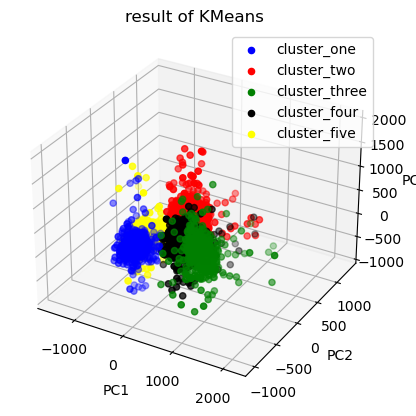

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(k1.iloc[:,0], k1.iloc[:,1], k1.iloc[:,2],label='cluster_one',marker='o',c='blue')
ax.scatter(k2.iloc[:,0], k2.iloc[:,1], k2.iloc[:,2],label='cluster_two',marker='o',c='red')
ax.scatter(k3.iloc[:,0], k3.iloc[:,1], k3.iloc[:,2],label='cluster_three',marker='o',c='green')
ax.scatter(k4.iloc[:,0], k4.iloc[:,1], k4.iloc[:,2],label='cluster_four',marker='o',c='black')
ax.scatter(k5.iloc[:,0], k5.iloc[:,1], k5.iloc[:,2],label='cluster_five',marker='o',c='yellow')

plt.title("result of KMeans")
plt.legend()
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

### 3.2 对2维空间进行聚类

In [11]:
#利用K-means进行聚类
from sklearn.cluster import KMeans
kms2 = KMeans(n_clusters=5) #聚类成5类
kms2.fit(new_data2)

centers = kms.cluster_centers_
print(centers)

E:\soft\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[-437.14749614 -436.12350036   21.36646543]
 [-112.86344295  452.81874738   78.95911344]
 [ 809.2161768  -322.80846253  129.73730925]
 [ 216.77670633  -18.14007495  -44.48386368]
 [-628.16146427  -96.44495206  -80.42288511]]


In [12]:
#代码参考https://blog.csdn.net/icefountain/article/details/129181949
y_train2 = pd.Series(kms2.labels_)
y_train2.rename('res',inplace=True)

result2 = pd.concat([pd.DataFrame(new_data2),y_train2],axis=1)
print(result2)

Category_one = result2[result2['res'].values == 0]
k1 = result2.iloc[Category_one.index]

Category_two = result2[result2['res'].values == 1]
k2 = result2.iloc[Category_two.index]

Category_three = result2[result2['res'].values == 2]
k3 =result2.iloc[Category_three.index]

Category_four = result2[result2['res'].values == 3]
k4 =result2.iloc[Category_four.index]

Category_five = result2[result2['res'].values == 4]
k5 =result2.iloc[Category_five.index]

               0           1  res
0     274.173897  -55.102187    1
1    -652.027320  125.891564    2
2     124.204498   -7.126487    1
3    -532.533707  -22.940726    2
4    -163.147905  386.217092    0
...          ...         ...  ...
5371 -723.096962 -277.957215    2
5372  155.468744   32.376212    1
5373 -760.551696 -193.470770    2
5374 -581.524053   44.646031    2
5375  846.141663 -477.687502    4

[5376 rows x 3 columns]


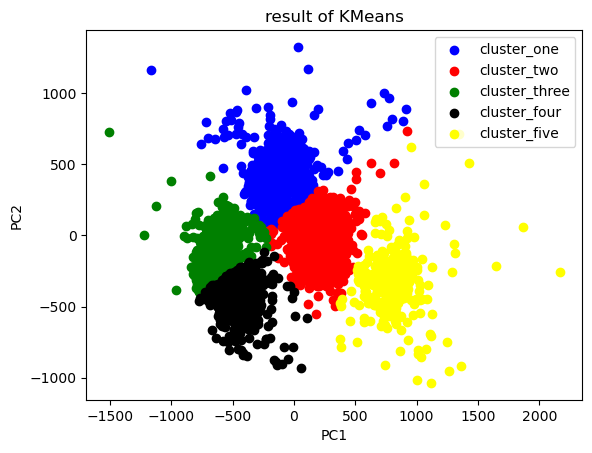

In [13]:
plt.figure()
plt.scatter(k1.iloc[:,0], k1.iloc[:,1],label='cluster_one',marker='o',c='blue')
plt.scatter(k2.iloc[:,0], k2.iloc[:,1],label='cluster_two',marker='o',c='red')
plt.scatter(k3.iloc[:,0], k3.iloc[:,1],label='cluster_three',marker='o',c='green')
plt.scatter(k4.iloc[:,0], k4.iloc[:,1],label='cluster_four',marker='o',c='black')
plt.scatter(k5.iloc[:,0], k5.iloc[:,1],label='cluster_five',marker='o',c='yellow')

plt.title("result of KMeans")
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## 4.将Spike sorting 之后的波形按照神经细胞归类并画图

### 4.1 3d

E:\soft\Anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


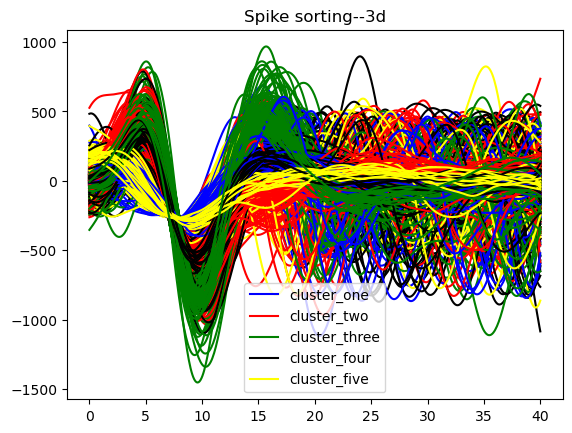

In [14]:
new_result = np.array(result)

t = np.arange(0, 40) #按顺序生成40个点
for i in range(5376):
    if new_result[i][3] == 0:
        m = make_interp_spline(t, spike_data[i])
        xs = np.linspace(0, 40, 500)
        ys = m(xs)
        plot1, = plt.plot(xs, ys, color='blue')
    if new_result[i][3] == 1:
        m = make_interp_spline(t, spike_data[i])
        xs = np.linspace(0, 40, 500)
        ys = m(xs)
        plot2, = plt.plot(xs, ys, color='red')
    if new_result[i][3] == 2:
        m = make_interp_spline(t, spike_data[i])
        xs = np.linspace(0, 40, 500)
        ys = m(xs)
        plot3, = plt.plot(xs, ys, color='green')
    if new_result[i][3] == 3:
        m = make_interp_spline(t, spike_data[i])
        xs = np.linspace(0, 40, 500)
        ys = m(xs)
        plot4, = plt.plot(xs, ys, color='black')
    if new_result[i][3] == 4:
        m = make_interp_spline(t, spike_data[i])
        xs = np.linspace(0, 40, 500)
        ys = m(xs)
        plot5, = plt.plot(xs, ys, color='yellow')
plt.legend([plot1, plot2, plot3, plot4, plot5], ['cluster_one', 'cluster_two', 'cluster_three', 'cluster_four', 'cluster_five'])
plt.title('Spike sorting--3d')
plt.show()

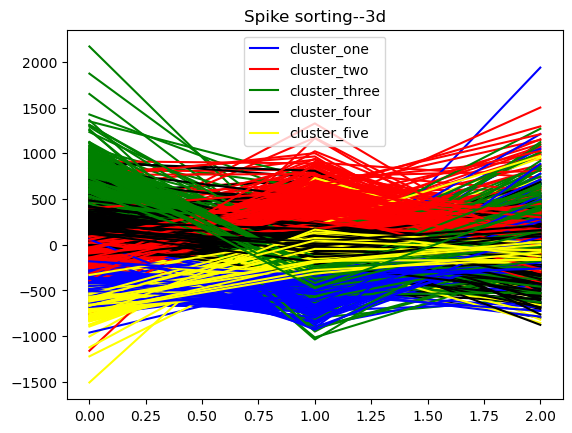

In [15]:
new_result = np.array(result)

t = np.arange(0, 3)
for i in range(5376):
    if new_result[i][3] == 0:
                plot1, = plt.plot(t, new_data[i], color='blue')
    if new_result[i][3] == 1:
        plot2, = plt.plot(t, new_data[i], color='red')
    if new_result[i][3] == 2:
        plot3, = plt.plot(t, new_data[i], color='green')
    if new_result[i][3] == 3:
        plot4, = plt.plot(t, new_data[i], color='black')
    if new_result[i][3] == 4:
        plot5, = plt.plot(t, new_data[i], color='yellow')
plt.legend([plot1, plot2, plot3, plot4, plot5], ['cluster_one', 'cluster_two', 'cluster_three', 'cluster_four', 'cluster_five'])
plt.title('Spike sorting--3d')
plt.show()

### 4.2 2d

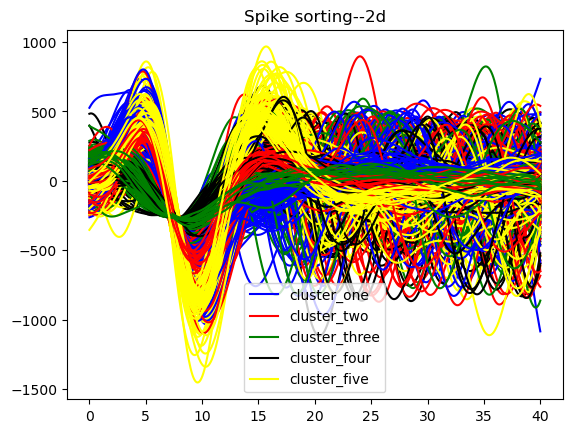

In [16]:
new_result2 = np.array(result2)

t = np.arange(0, 40) #按顺序生成40个点
for i in range(5376):
    if new_result2[i][2] == 0:
        m = make_interp_spline(t, spike_data[i])
        xs = np.linspace(0, 40, 500)
        ys = m(xs)
        plot1, = plt.plot(xs, ys, color='blue')
    if new_result2[i][2] == 1:
        m = make_interp_spline(t, spike_data[i])
        xs = np.linspace(0, 40, 500)
        ys = m(xs)
        plot2, = plt.plot(xs, ys, color='red')
    if new_result2[i][2] == 2:
        m = make_interp_spline(t, spike_data[i])
        xs = np.linspace(0, 40, 500)
        ys = m(xs)
        plot3, = plt.plot(xs, ys, color='green')
    if new_result2[i][2] == 3:
        m = make_interp_spline(t, spike_data[i])
        xs = np.linspace(0, 40, 500)
        ys = m(xs)
        plot4, = plt.plot(xs, ys, color='black')
    if new_result2[i][2] == 4:
        m = make_interp_spline(t, spike_data[i])
        xs = np.linspace(0, 40, 500)
        ys = m(xs)
        plot5, = plt.plot(xs, ys, color='yellow')
plt.legend([plot1, plot2, plot3, plot4, plot5], ['cluster_one', 'cluster_two', 'cluster_three', 'cluster_four', 'cluster_five'])
plt.title('Spike sorting--2d')
plt.show()

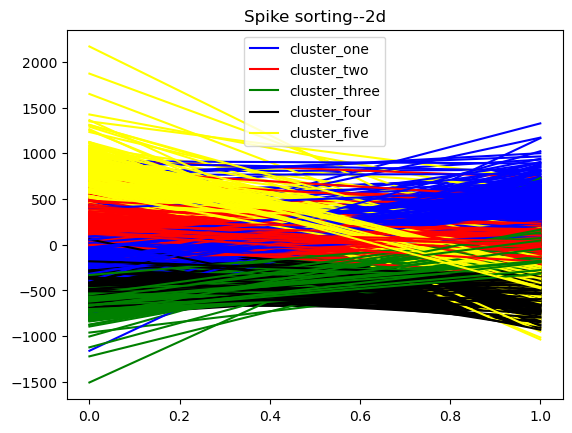

In [17]:
new_result2 = np.array(result2)

t = np.arange(0, 2)
for i in range(5376):
    if new_result2[i][2] == 0:
        plot1, = plt.plot(t, new_data2[i], color='blue')
    if new_result2[i][2] == 1:
        plot2, = plt.plot(t, new_data2[i], color='red')
    if new_result2[i][2] == 2:
        plot3, = plt.plot(t, new_data2[i], color='green')
    if new_result2[i][2] == 3:
        plot4, = plt.plot(t, new_data2[i], color='black')
    if new_result2[i][2] == 4:
        plot5, = plt.plot(t, new_data2[i], color='yellow')
plt.legend([plot1, plot2, plot3, plot4, plot5], ['cluster_one', 'cluster_two', 'cluster_three', 'cluster_four', 'cluster_five'])
plt.title('Spike sorting--2d')
plt.show()